<a href="https://colab.research.google.com/github/laraibpervaiz/Final-Year-Project/blob/main/Predicting%20Nursery%20School%20Admission_EDA_Preprocessor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Nursery School Admission Priorities Based on Socioeconomic and Family Indicators**

# **Section 1: Importing Relevent Libraries Files**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from itertools import cycle

# Set visualization style
sns.set(style="whitegrid")

# **Section 2: Loading Dataset**

In [32]:
# Define column names based on the documentation
columns = [
    'parents',     # parents' occupation
    'has_nurs',    # child's nursery
    'form',        # form of the family
    'children',    # number of children
    'housing',     # housing conditions
    'finance',     # financial standing of the family
    'social',      # social picture
    'health',      # health picture
    'class'        # final evaluation (target variable)
]

# Load the data
# Replace 'nursery.data' with the actual path to your file
df = pd.read_csv('nursery.data', names=columns)

print("Data loaded successfully.")

Data loaded successfully.


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Section 3: Exploratory Data Analysis**

## **Section 3.1: Dataset View**

In [34]:
# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# General information about the dataset (rows, columns, data types)
print("\nDataset Information:")
df.info()

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

First 5 rows of the dataset:


,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12960 non-null  object
 1   has_nurs  12960 non-null  object
 2   form      12960 non-null  object
 3   children  12960 non-null  object
 4   housing   12960 non-null  object
 5   finance   12960 non-null  object
 6   social    12960 non-null  object
 7   health    12960 non-null  object
 8   class     12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB

Missing Values per Column:
parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
class       0
dtype: int64


## **Section 3.2: Statistical Summary of Dataset**

In [35]:
# Statistical summary for categorical data
print("Summary Statistics:")
display(df.describe())

Summary Statistics:


,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


## **Section 3.3: Distribution of Target Variable**

Total counts for each class:
class
not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: count, dtype: int64


/tmp/ipython-input-826533451.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class', data=df, order=class_counts.index, palette='viridis')


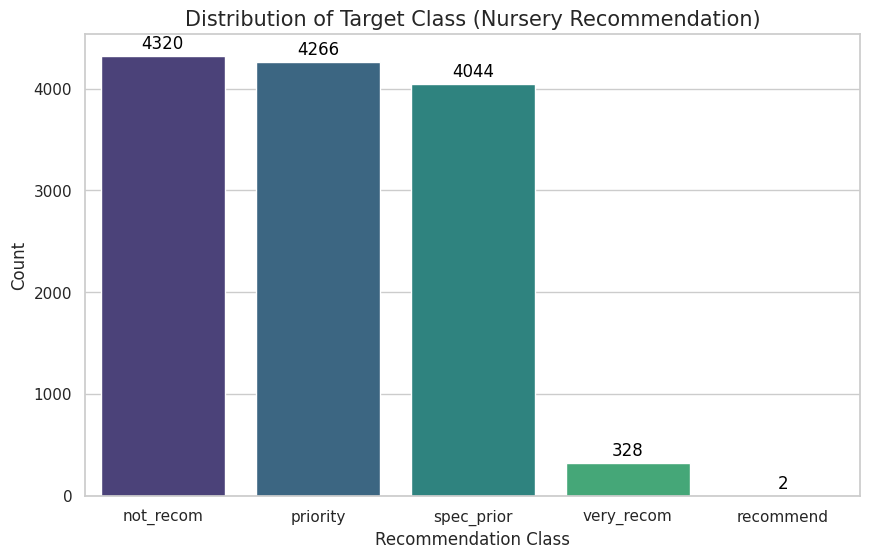

In [36]:
# Calculate the total counts for each class
class_counts = df['class'].value_counts()

# Print the counts
print("Total counts for each class:")
print(class_counts)

# Visualize the distribution with counts on top of bars
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='class', data=df, order=class_counts.index, palette='viridis')

# Add titles and labels
plt.title('Distribution of Target Class (Nursery Recommendation)', fontsize=15)
plt.xlabel('Recommendation Class')
plt.ylabel('Count')

# Add text labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

## **Section 3.4: Distribution Graph of all features**

/tmp/ipython-input-178441168.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')
/tmp/ipython-input-178441168.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')
/tmp/ipython-input-178441168.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')
/tmp/ipython-input-178441168.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

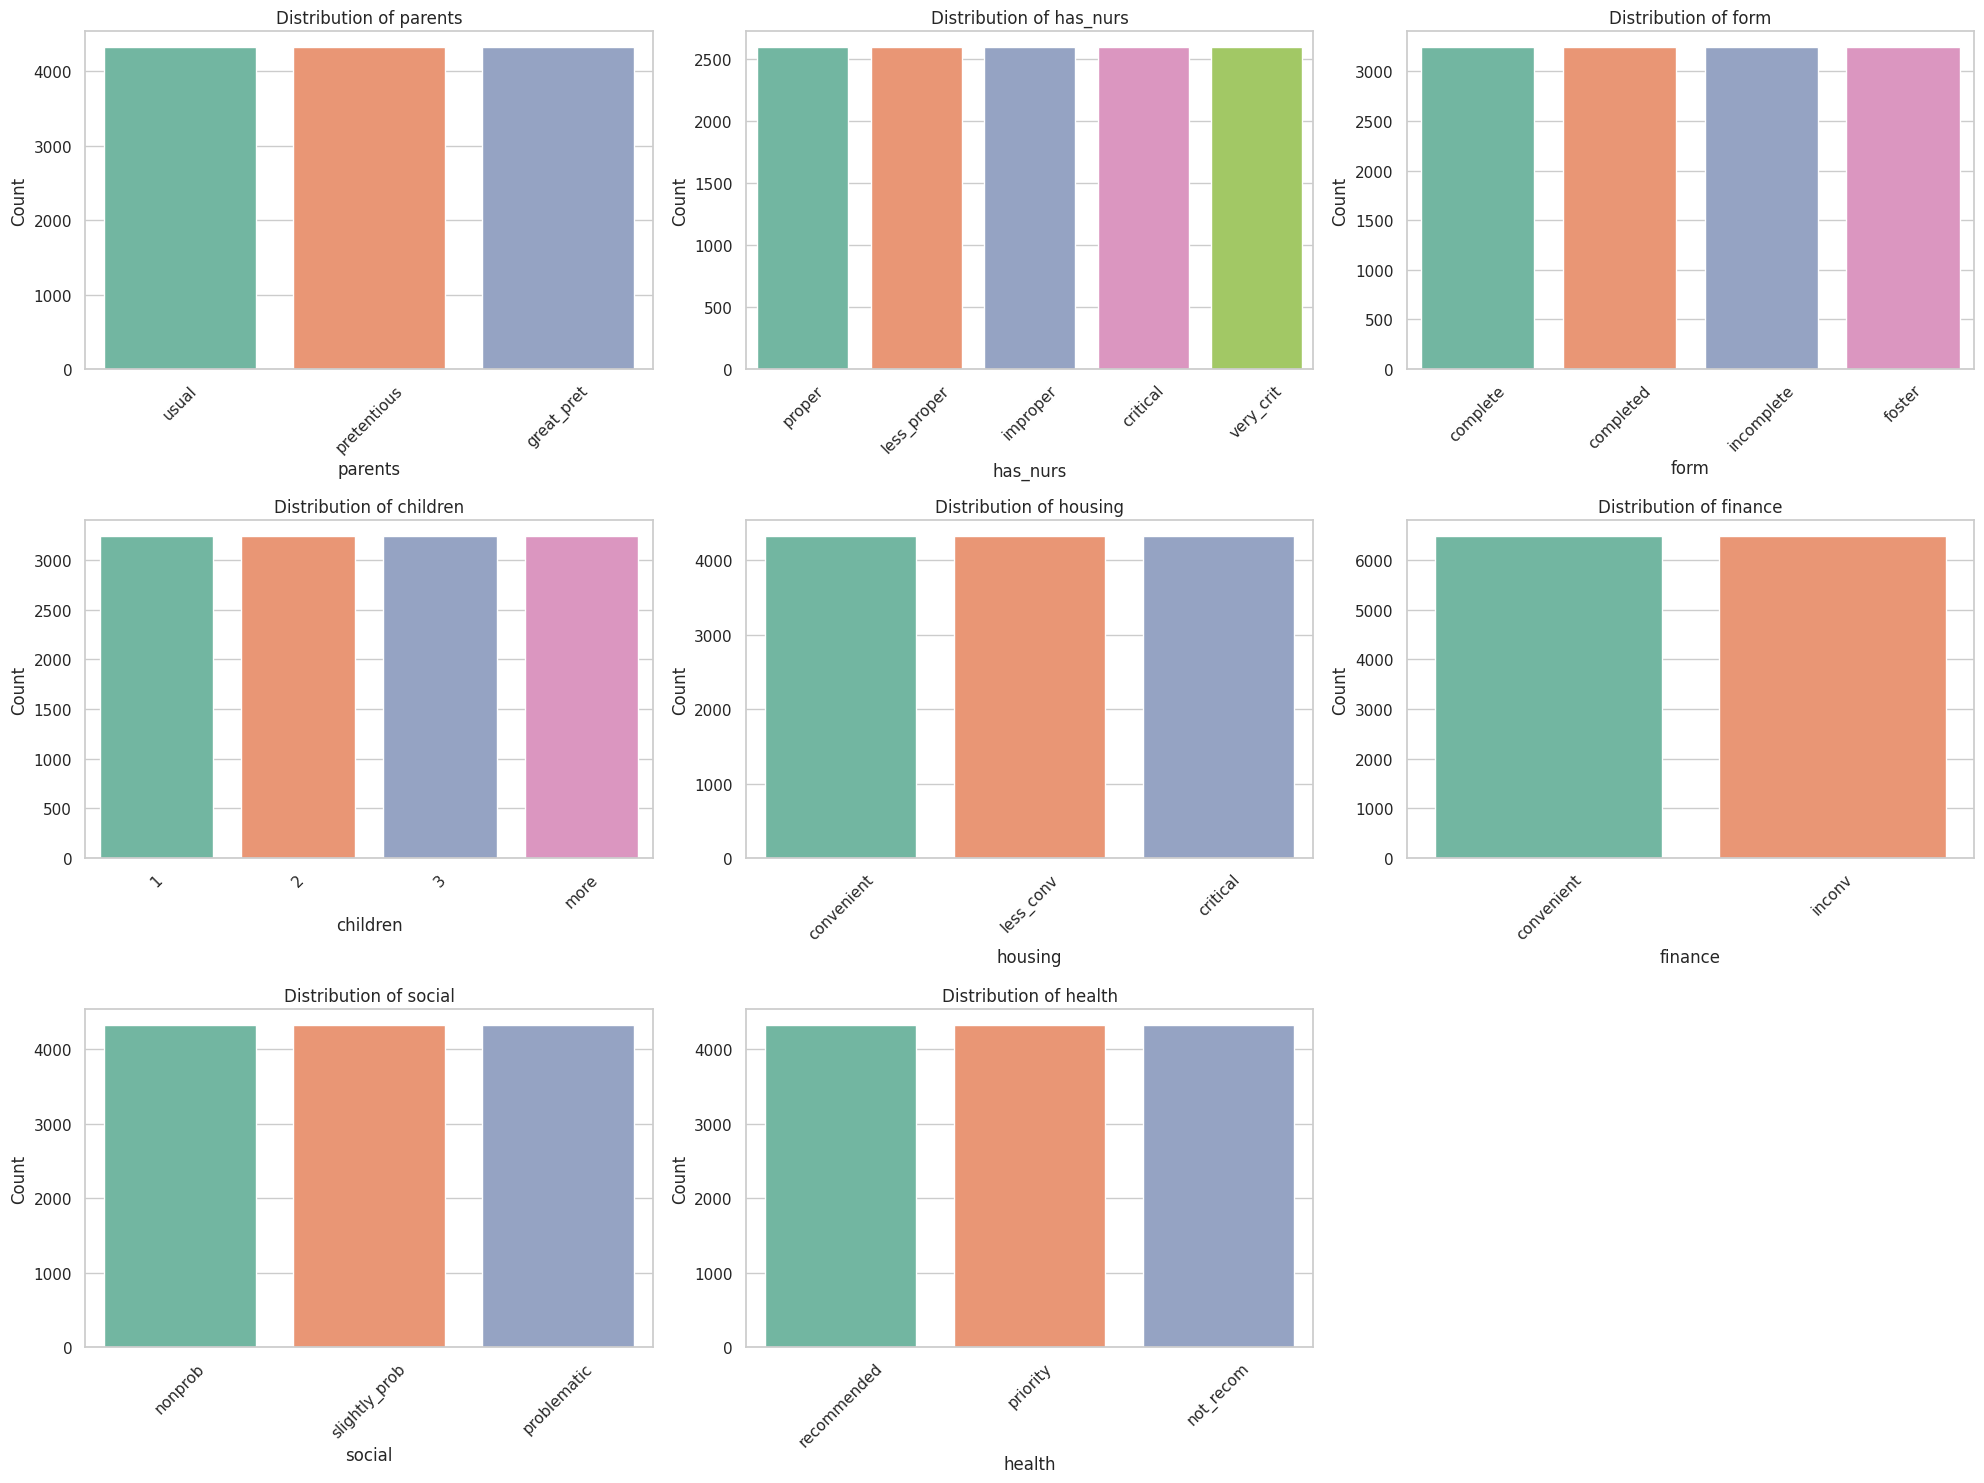

In [37]:
# Plot distribution for all feature columns (excluding target)
features = df.columns[:-1]  # All columns except 'class'

plt.figure(figsize=(20, 15))

for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xticks(rotation=45)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## **Section 3.5: Relation between health and Target Class**


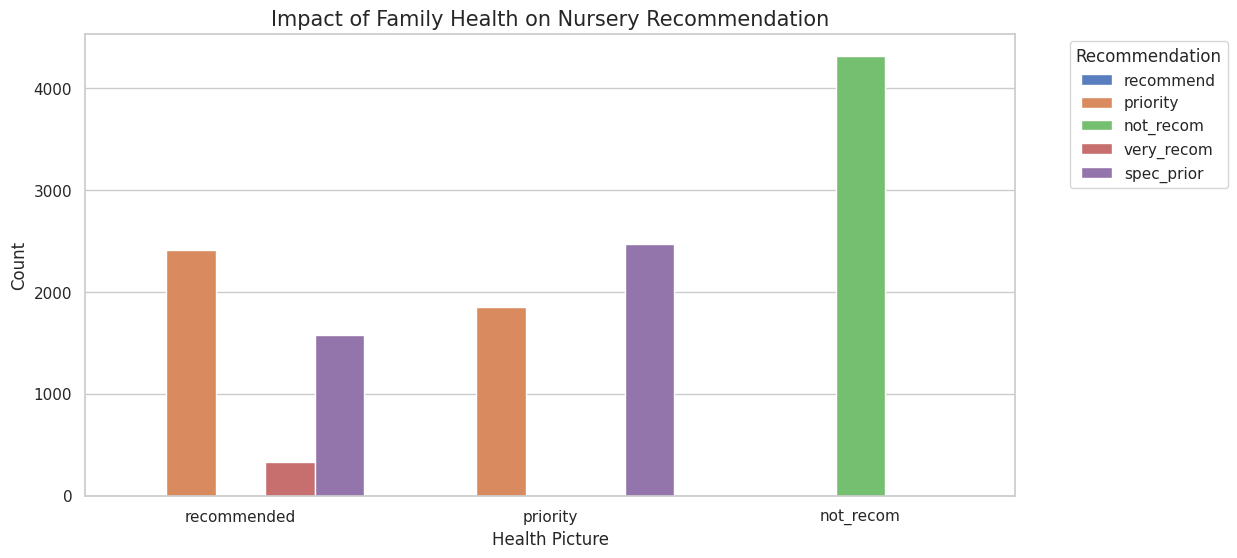

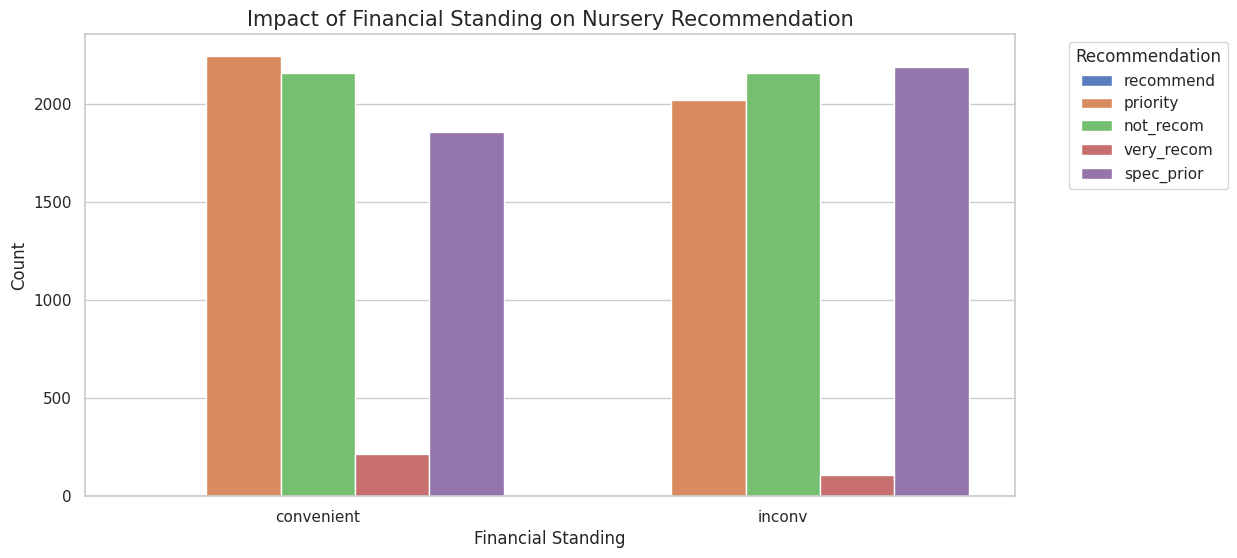

In [38]:
# Example: Relationship between 'health' and the target 'class'
plt.figure(figsize=(12, 6))
sns.countplot(x='health', hue='class', data=df, palette='muted')
plt.title('Impact of Family Health on Nursery Recommendation', fontsize=15)
plt.xlabel('Health Picture')
plt.ylabel('Count')
plt.legend(title='Recommendation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Example: Relationship between 'finance' and the target 'class'
plt.figure(figsize=(12, 6))
sns.countplot(x='finance', hue='class', data=df, palette='muted')
plt.title('Impact of Financial Standing on Nursery Recommendation', fontsize=15)
plt.xlabel('Financial Standing')
plt.ylabel('Count')
plt.legend(title='Recommendation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **Section 3.6: Correlation Metrics**


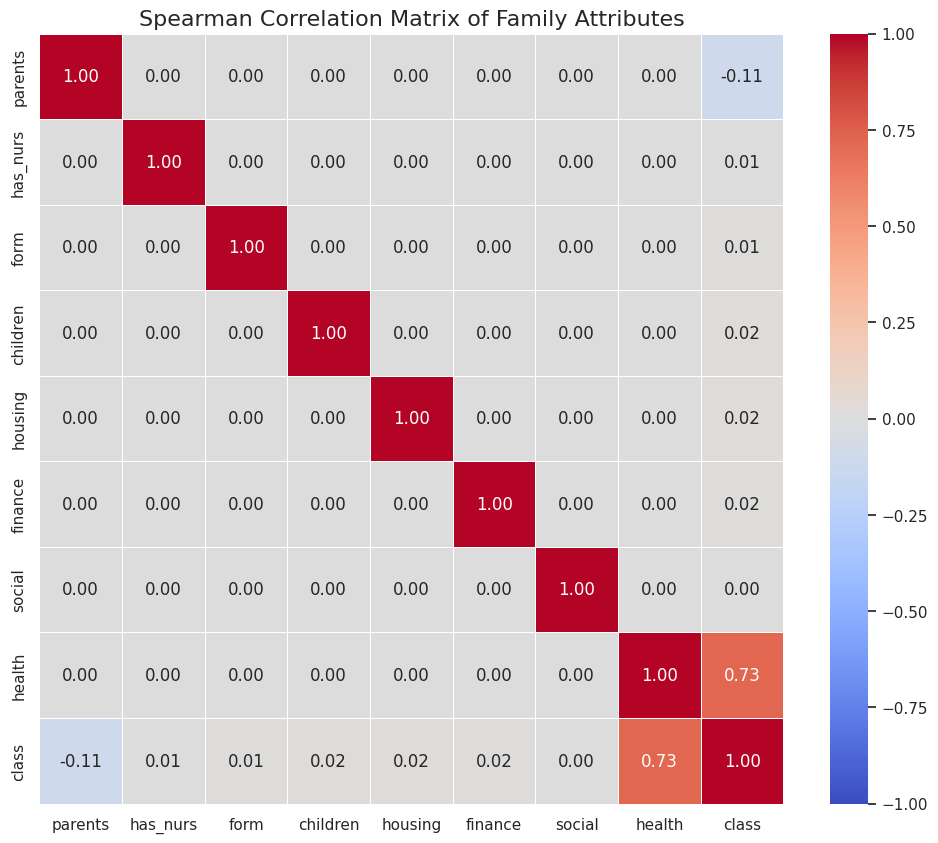


Feature Correlation with Target (Class):
          Spearman Correlation
health                0.725217
children              0.023279
housing               0.018425
finance               0.015044
form                  0.013994
has_nurs              0.006445
social                0.000000
parents              -0.106873


In [39]:
# We need numerical values to calculate correlation.
le_dict = {}
df_encoded = df.copy()

for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le

# 2. Calculate Spearman Correlation Matrix
# Spearman is chosen because the data is ordinal (ranked categories)
corr_matrix = df_encoded.corr(method='spearman')

# 3. Visualize with Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    vmin=-1,
    vmax=1
)
plt.title('Spearman Correlation Matrix of Family Attributes', fontsize=16)
plt.show()

# 4. Show Correlation with the Target Variable
target_corr = corr_matrix['class'].drop('class').sort_values(ascending=False)
print("\nFeature Correlation with Target (Class):")
print(target_corr.to_frame(name='Spearman Correlation'))

# **Section 4: Preprocessing**

In [40]:
# We keep the encoder dictionary to map numbers back to names later if needed
le_dict = {}
df_encoded = df.copy()

for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le

# Define X (Features) and y (Target)
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Get class names for plotting
classes = le_dict['class'].classes_
n_classes = len(classes)

print("Data Loaded and Encoded.")

Data Loaded and Encoded.


## **Section 4.1: Train-Test Split**


In [41]:
# Standard Split
# Note: Since the 'recommend' class has only 2 samples, a random split might
# put both in the training set (leaving none for testing) or vice versa.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (9072, 8)
Testing Data Shape: (3888, 8)
